### Importing Libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler


from sklearn.metrics import log_loss

from sklearn.model_selection import  GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

import pickle

In [29]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}
# activity_codes_mapping['A']: 'rgb(231, 41, 138)',

In [30]:
def show_accel_per_activity(device, df, act, interval_in_sec = None):
  # Plots acceleration time history per activity 

    df1 = df.loc[df.activity == act].copy()
    df1.reset_index(drop = True, inplace = True)

    df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

    if interval_in_sec == None:
        ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)
    else:
        ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) 
        ax.set_xlabel('duration  (sec)', fontsize = 15)
        ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
        ax.set_title('Acceleration:   Device: ' + device + 'Activity:' + act, fontsize = 15)

### reading the data

In [35]:
raw_par_10_phone_accel = pd.read_csv(r'raw/phone/accel/data_1610_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_10_phone_accel.z = raw_par_10_phone_accel.z.str.strip(';')
raw_par_10_phone_accel.z = pd.to_numeric(raw_par_10_phone_accel.z)

raw_par_10_phone_accel['activity'] = raw_par_10_phone_accel['activity_code'].map(activity_codes_mapping)

raw_par_10_phone_accel = raw_par_10_phone_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]
raw_par_10_phone_accel

,participant_id,activity_code,activity,timestamp,x,y,z
0,1610,A,walking,18687441561967,1.174957,13.347473,-4.034637
1,1610,A,walking,18687491915971,1.408188,7.091858,-3.895721
2,1610,A,walking,18687542269974,4.932510,6.306808,-2.339005
3,1610,A,walking,18687592623978,0.154648,6.123505,-1.831467
4,1610,A,walking,18687642977982,-2.826035,4.180542,-3.211899
...,...,...,...,...,...,...,...
80865,1610,S,folding clothes,17989031516129,5.946732,7.583008,-1.097260
80866,1610,S,folding clothes,17989081870133,5.818741,7.804871,-1.623733
80867,1610,S,folding clothes,17989132224137,5.530823,7.636093,-1.662643
80868,1610,S,folding clothes,17989182578141,5.802170,7.645752,-1.000412


### Time series graph for the acitivities performed

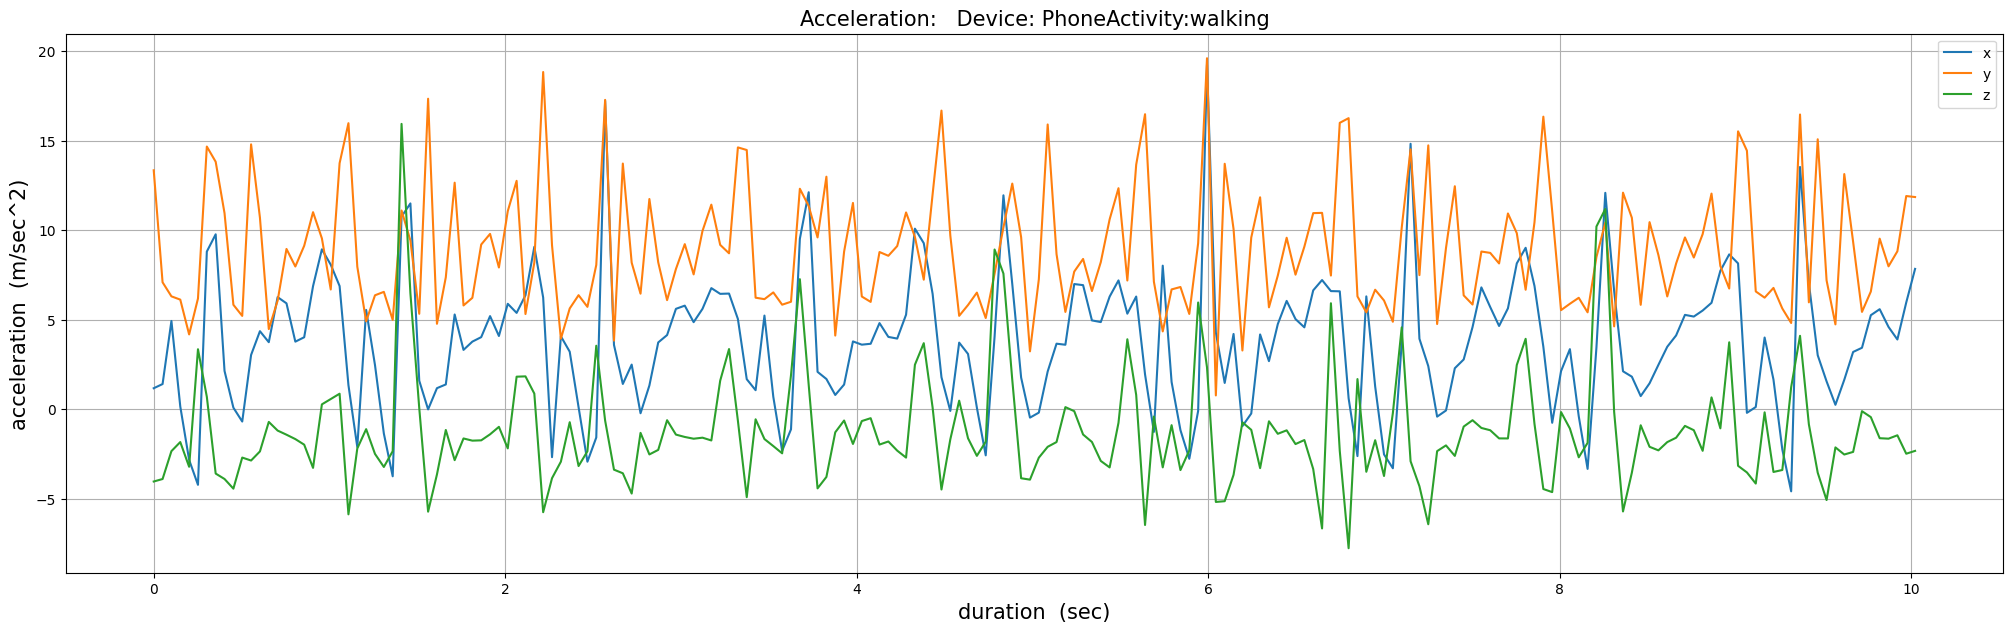

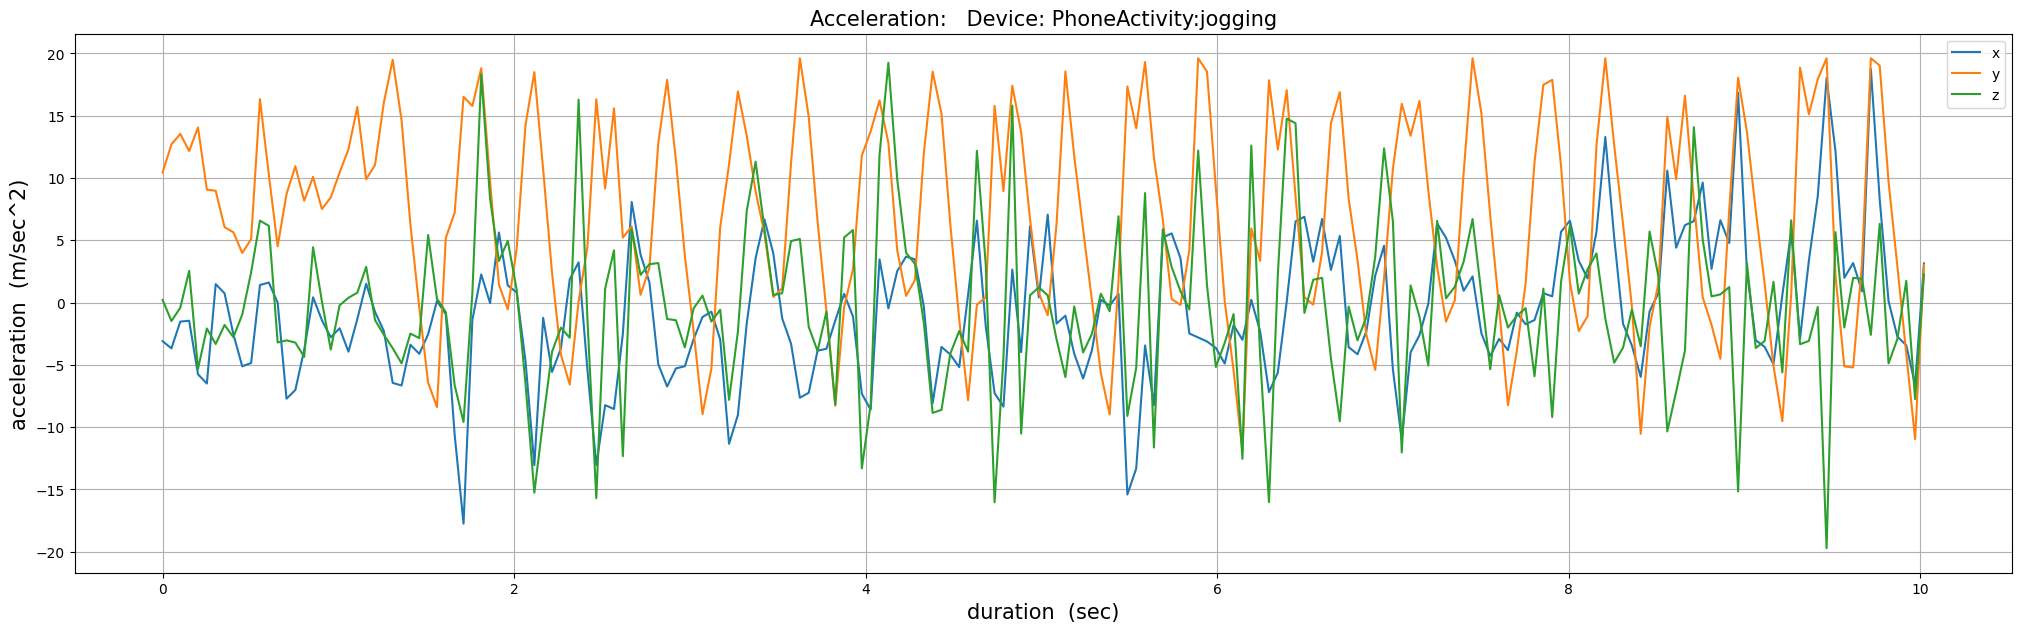

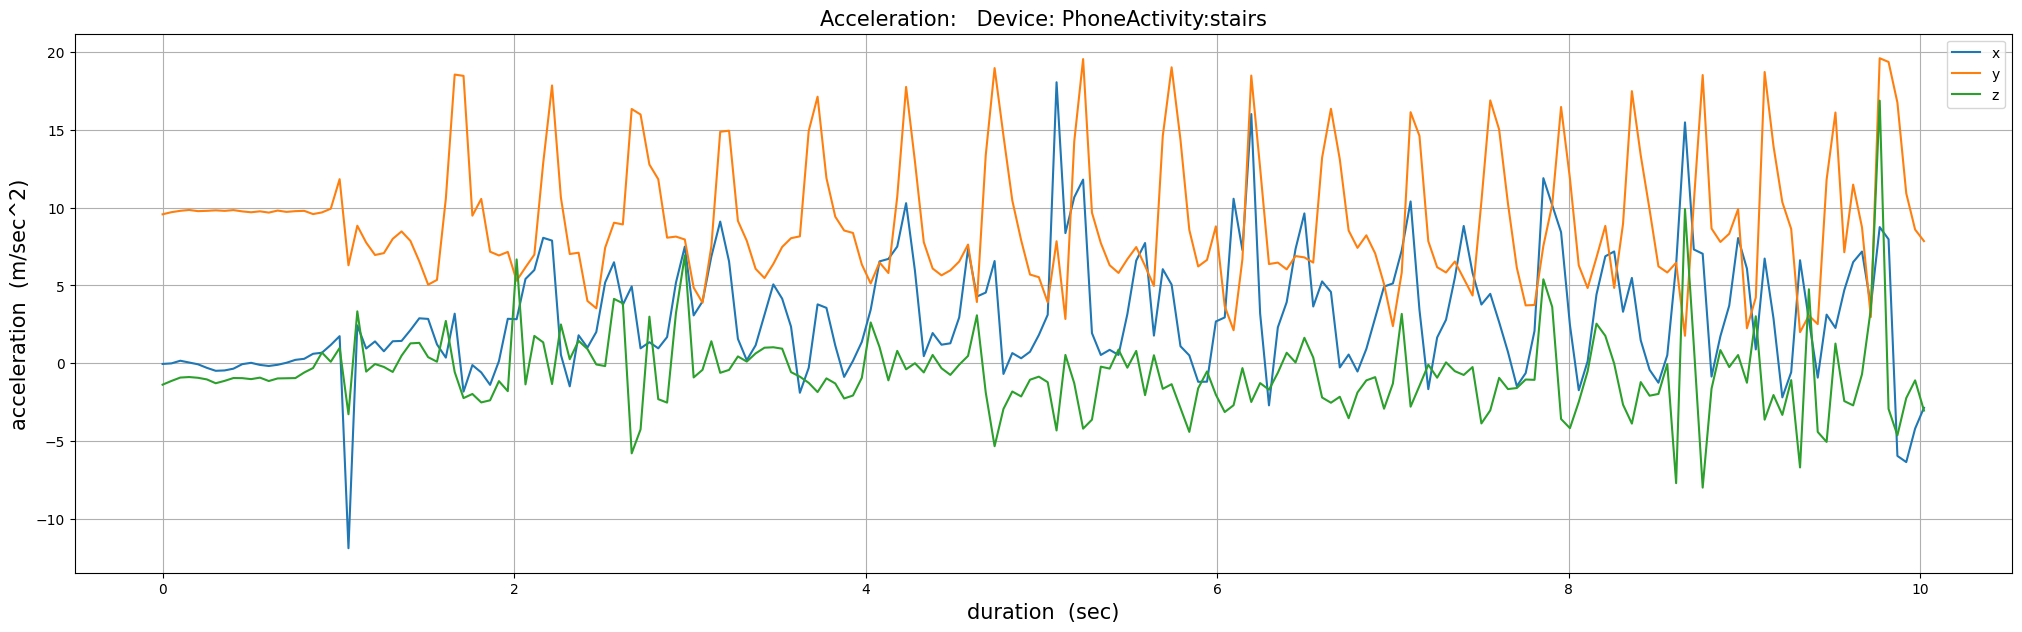

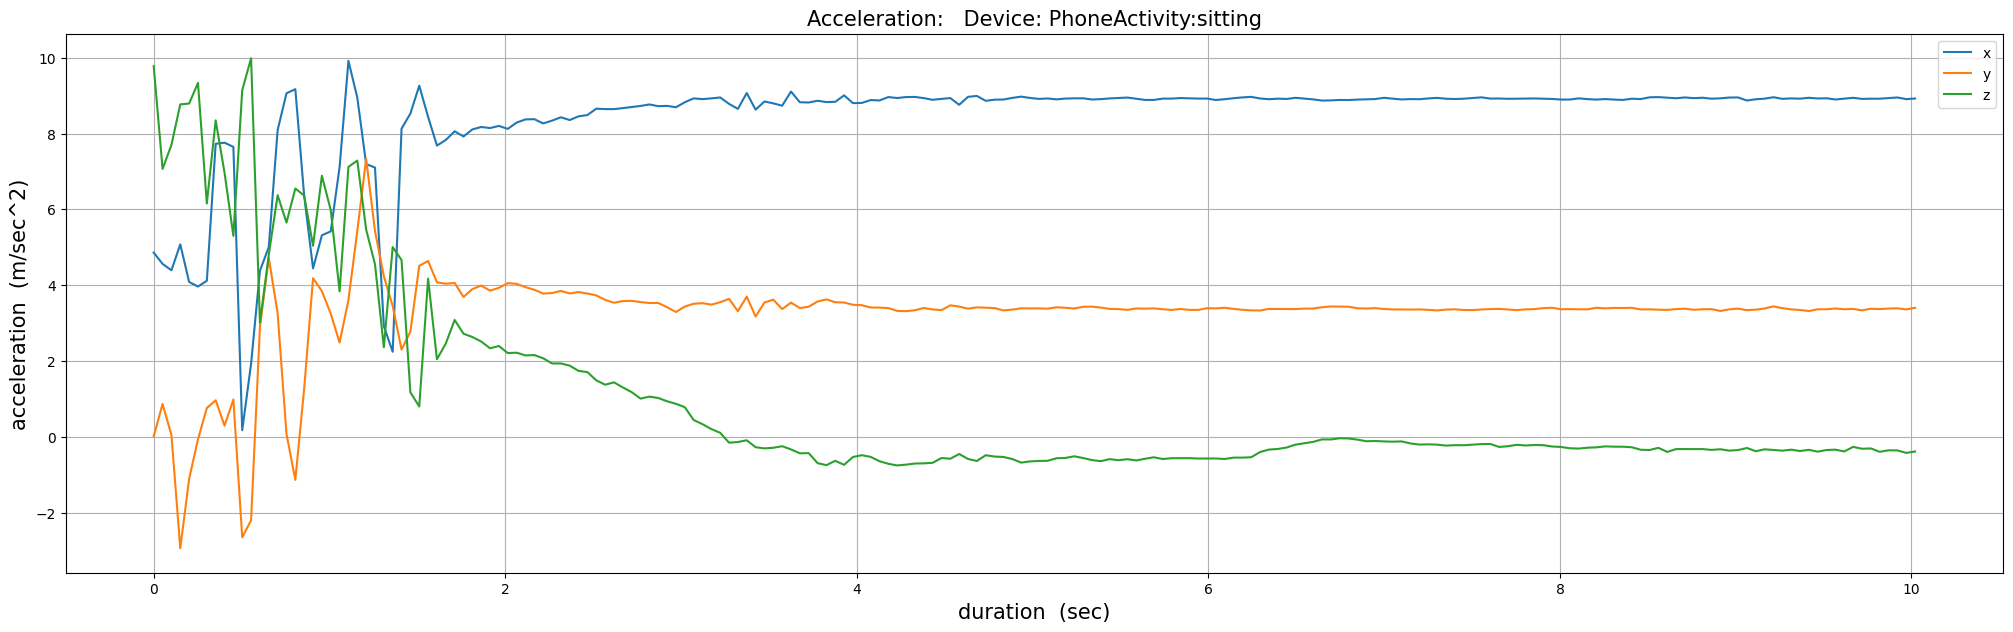

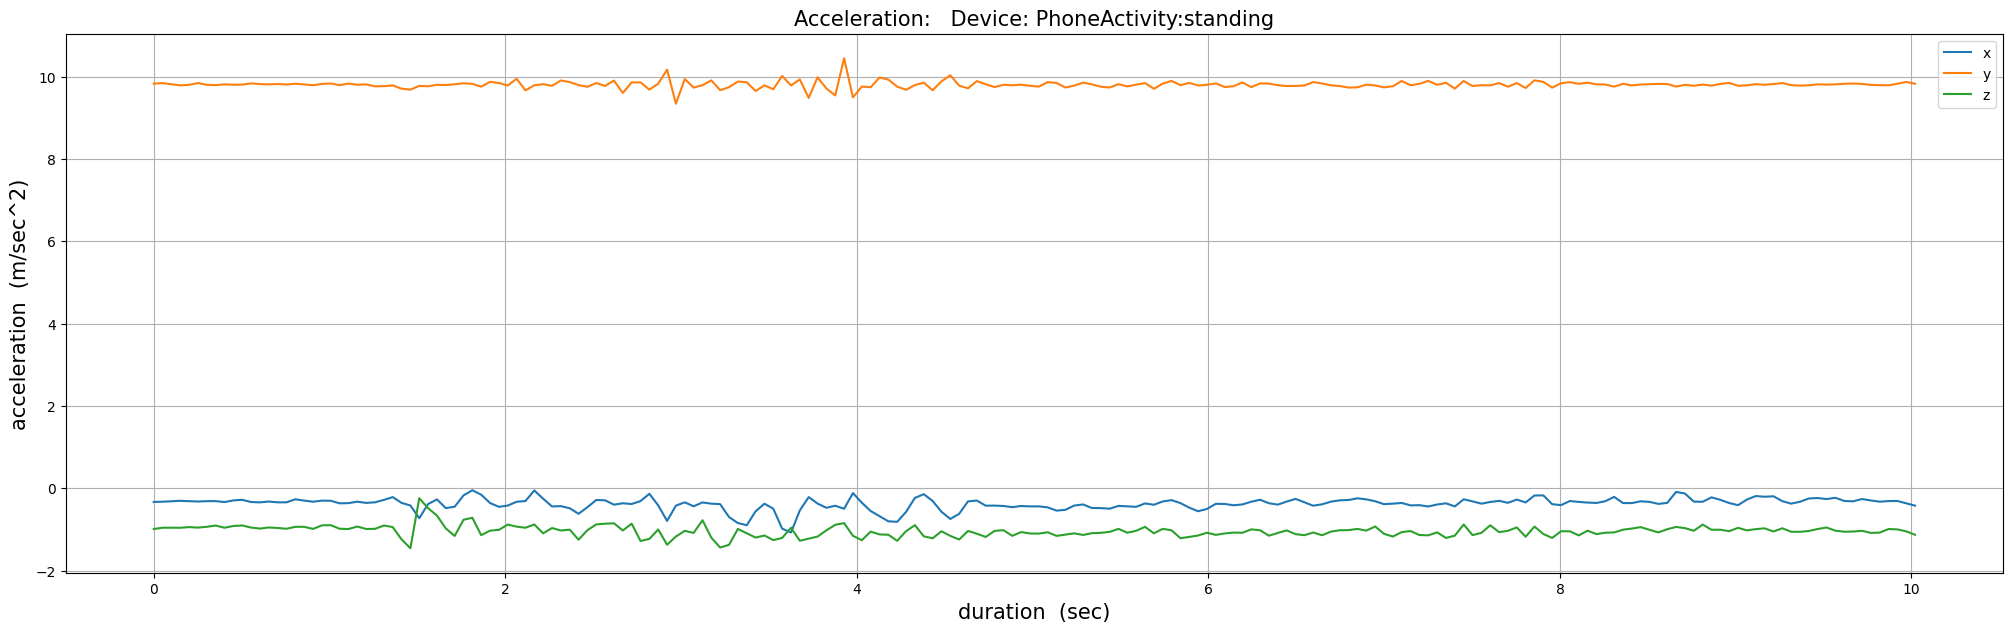

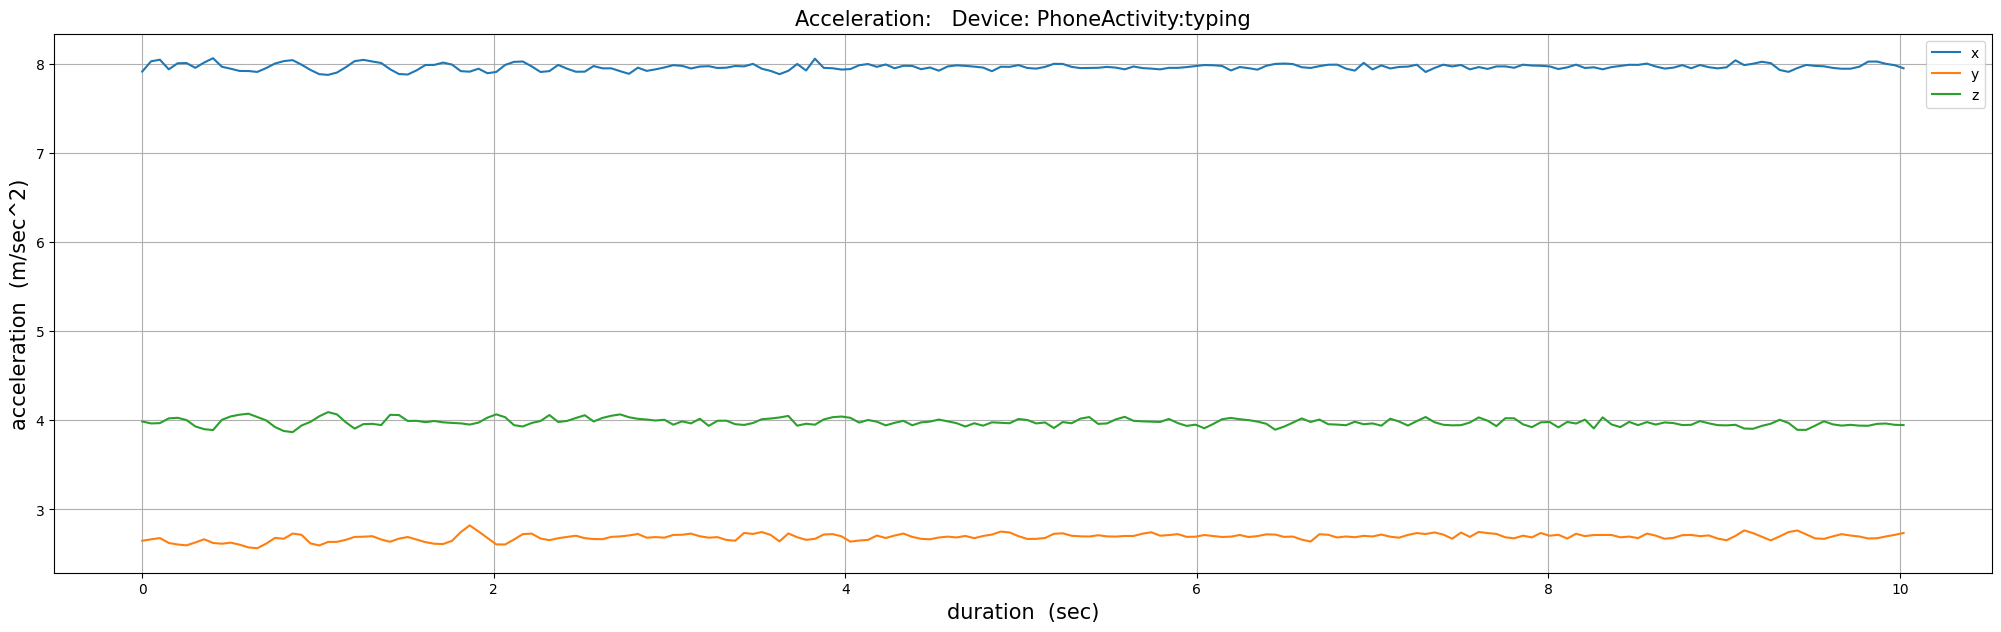

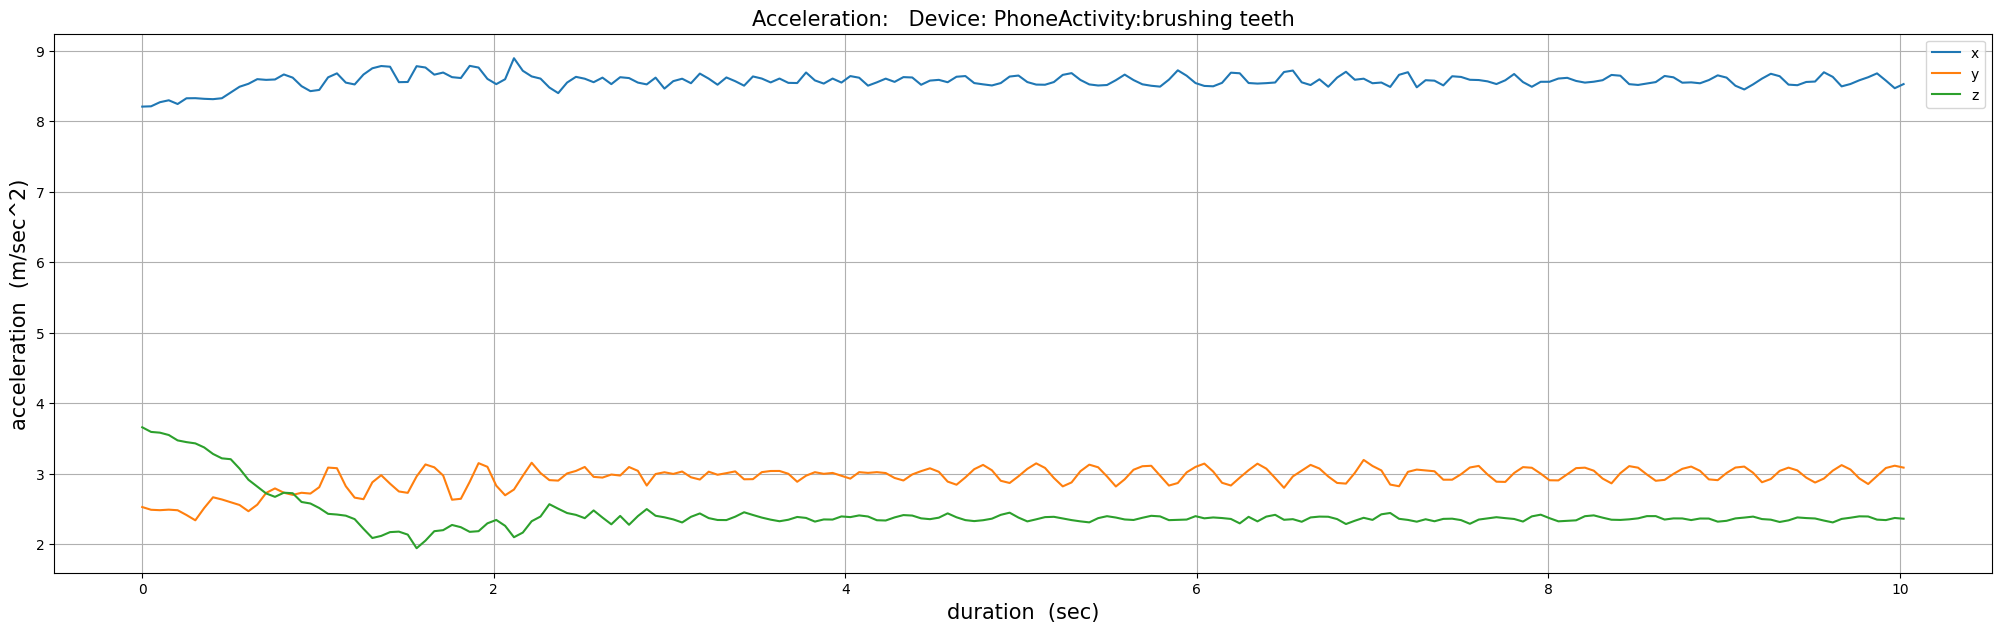

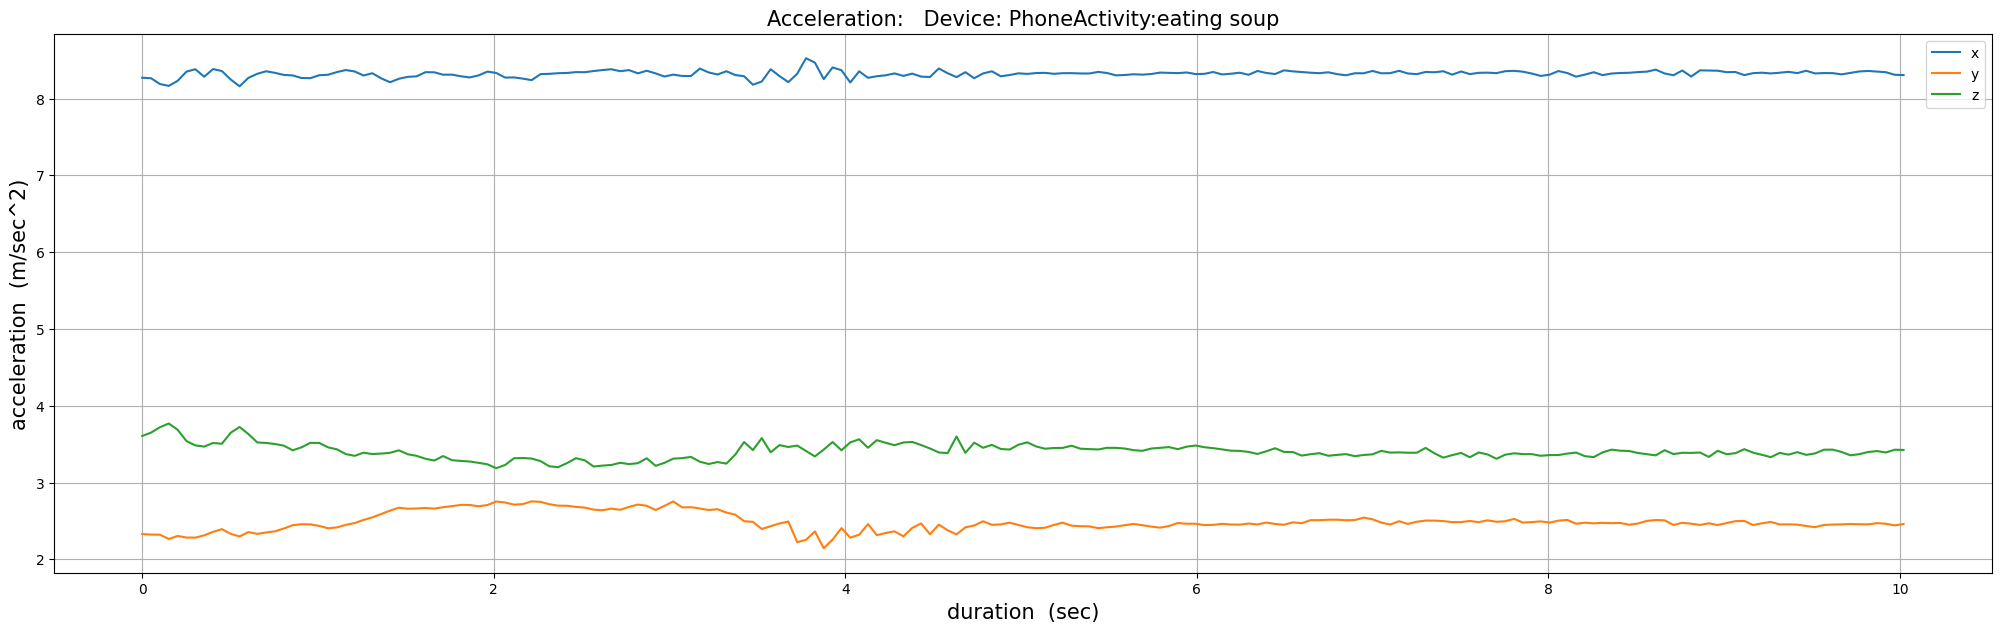

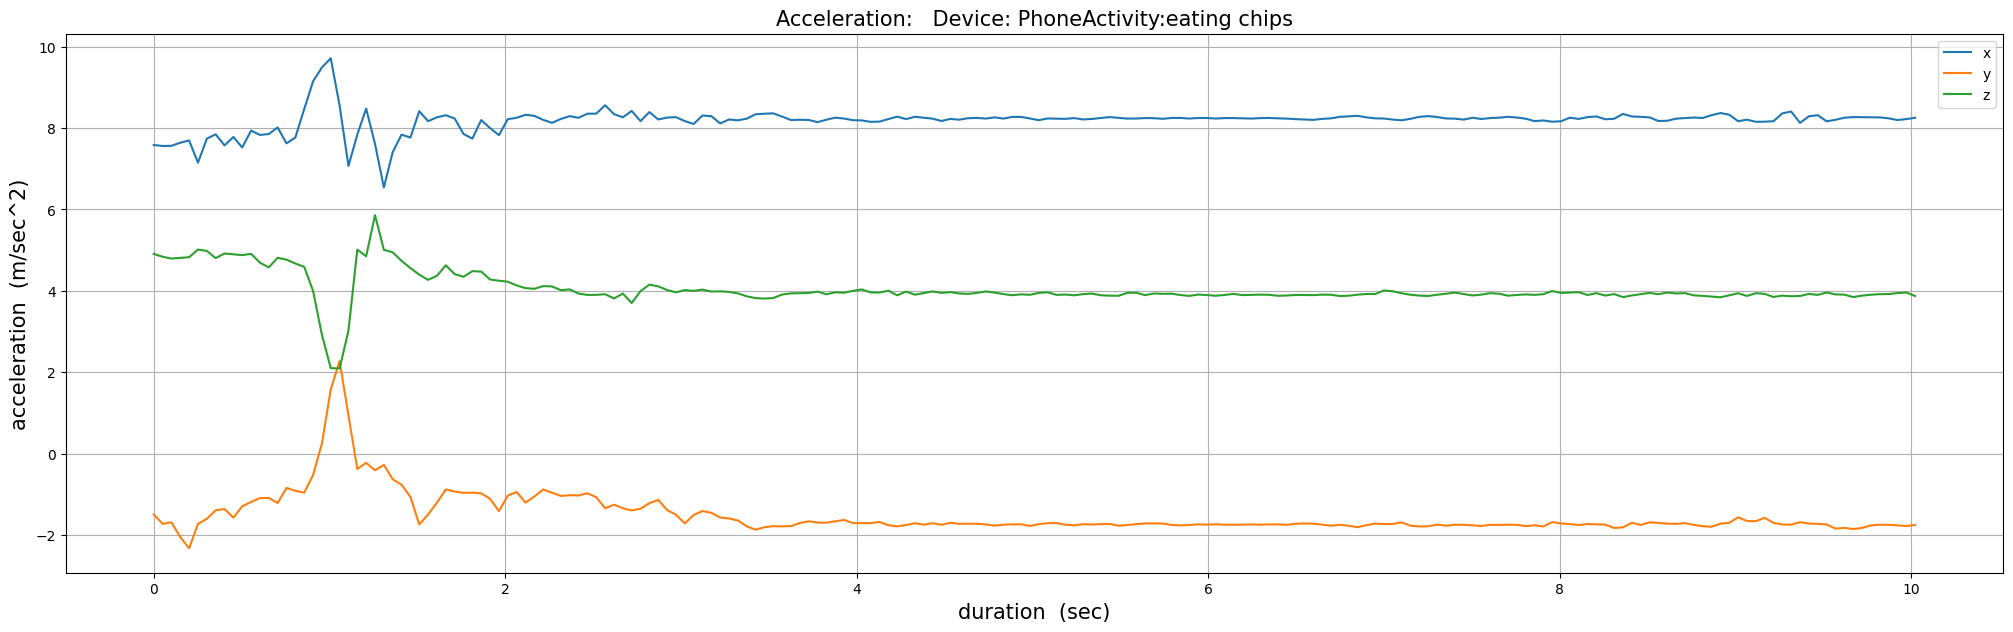

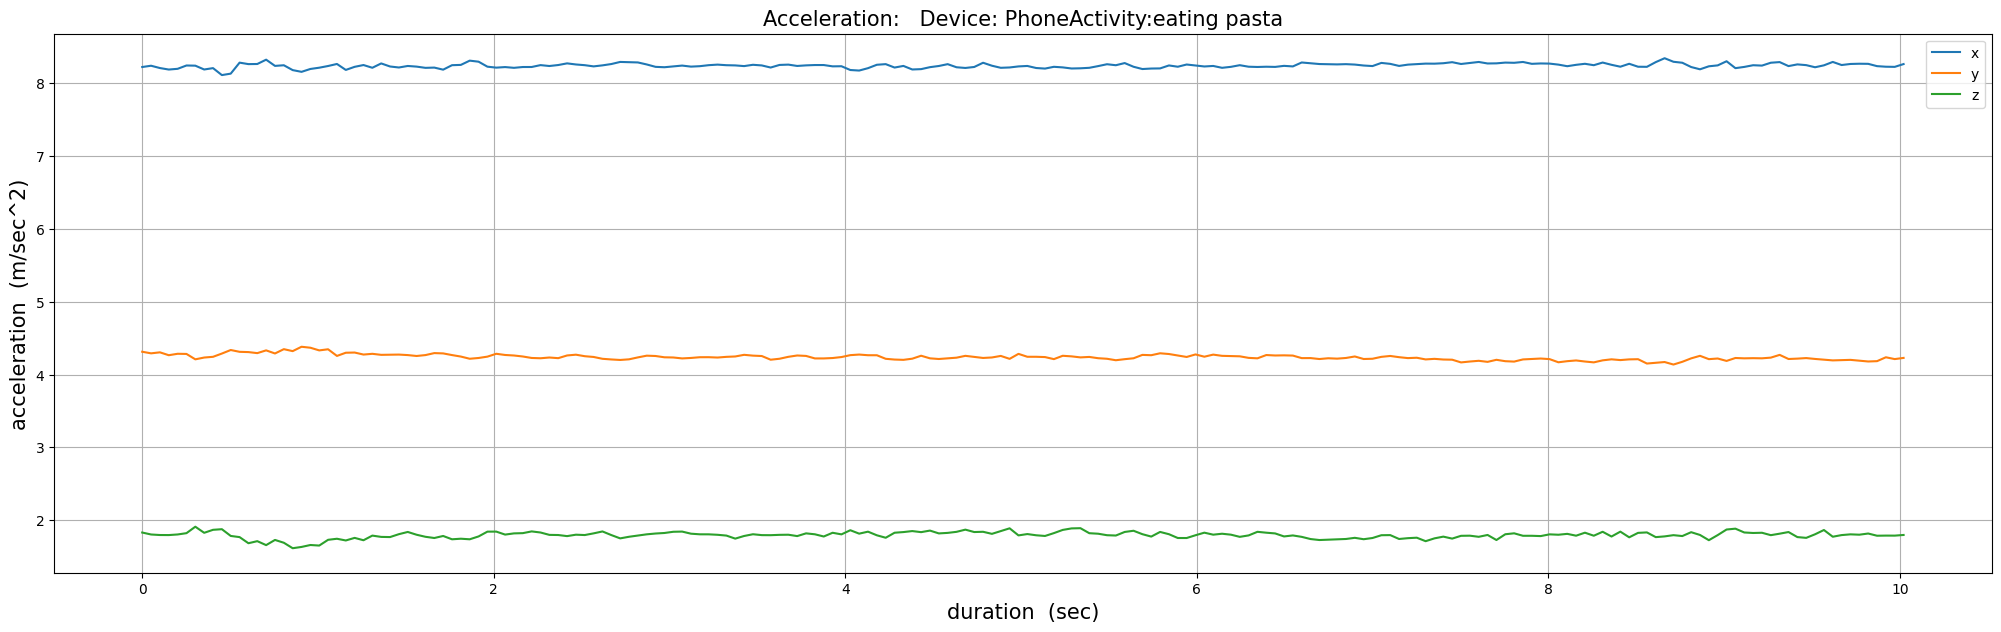

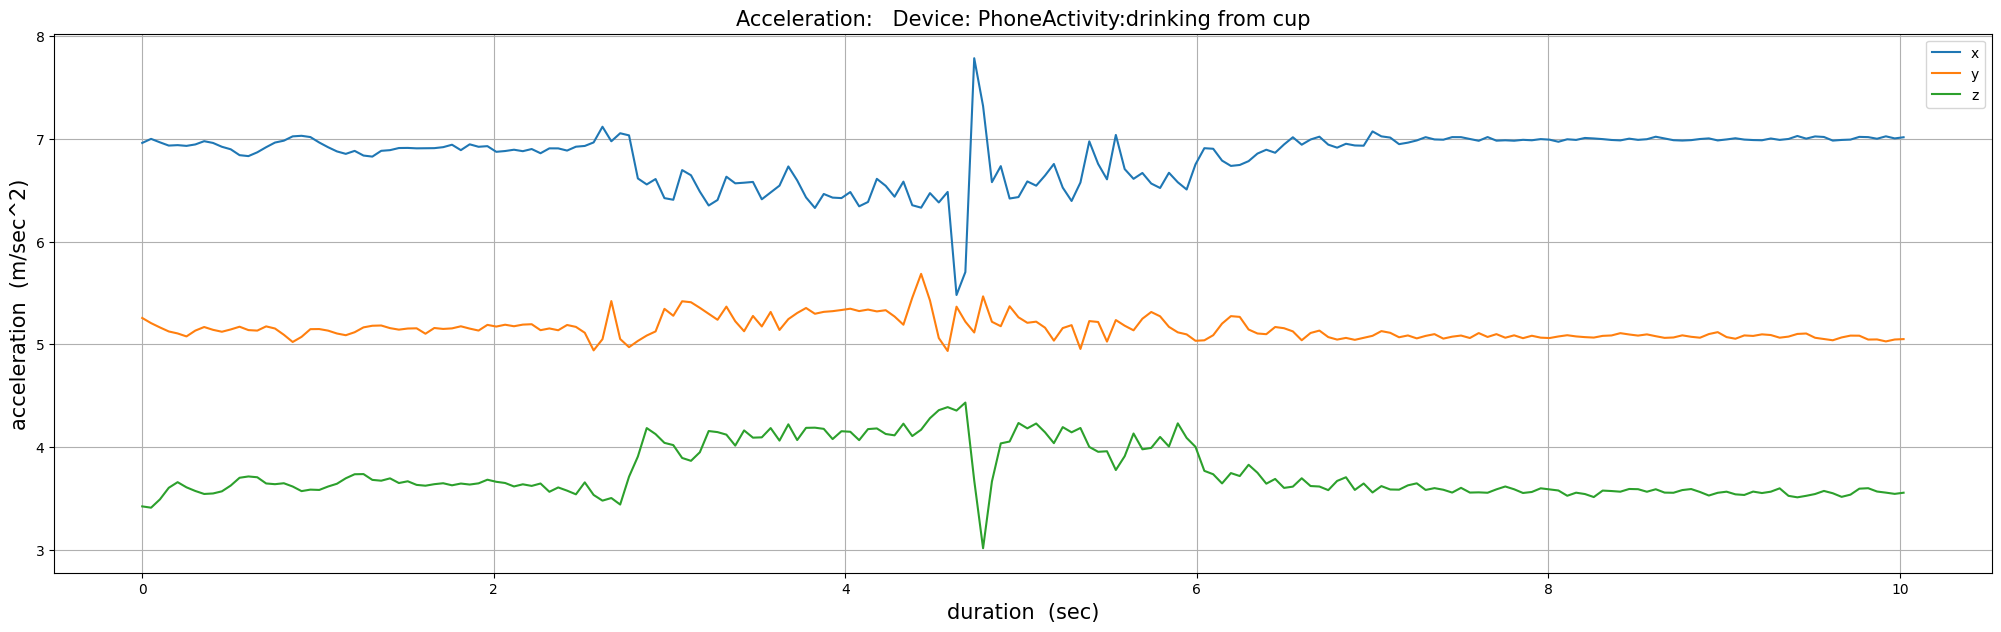

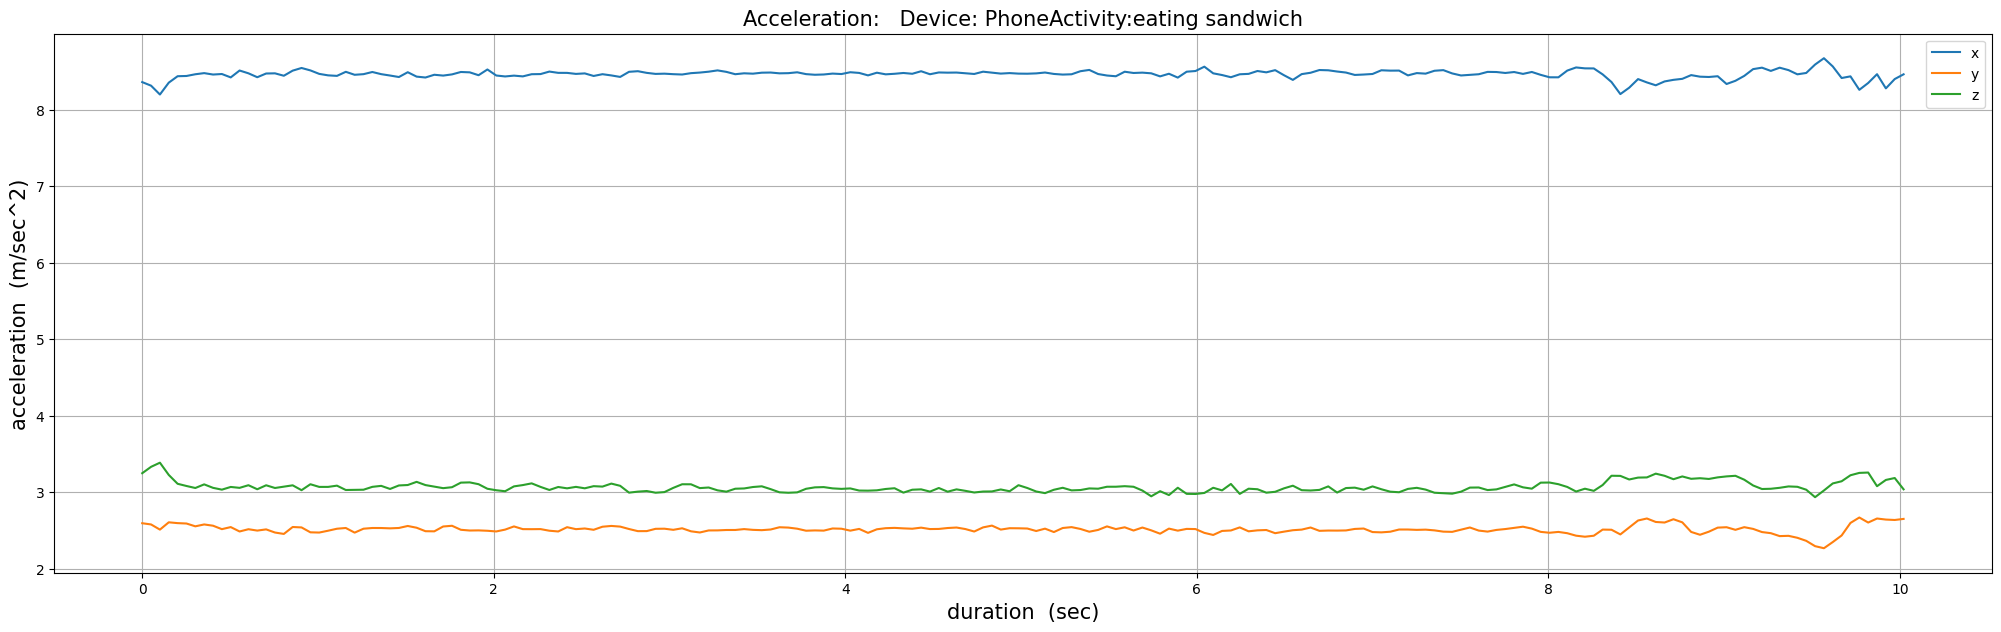

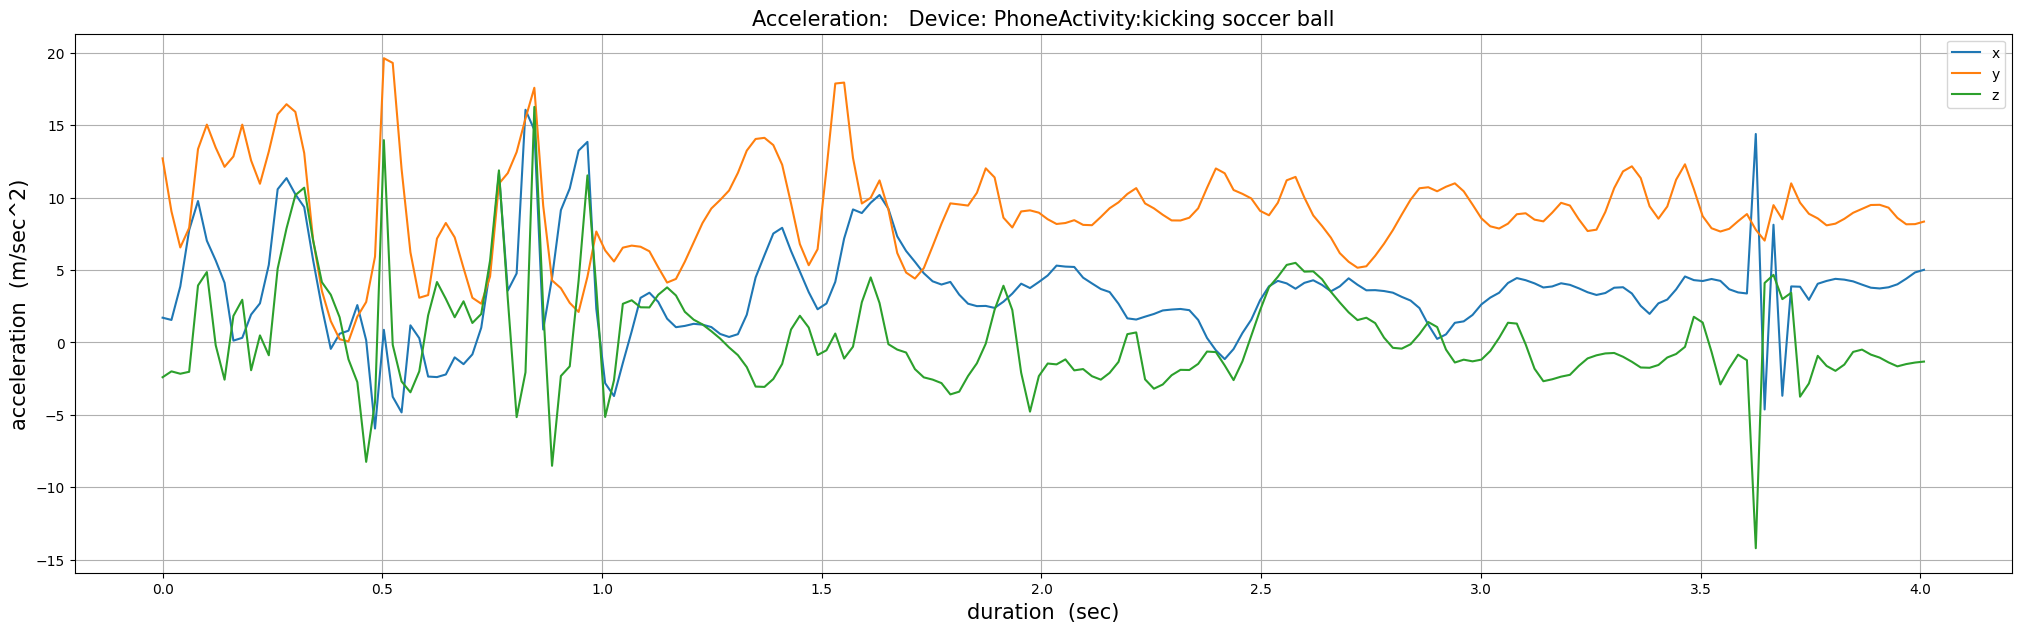

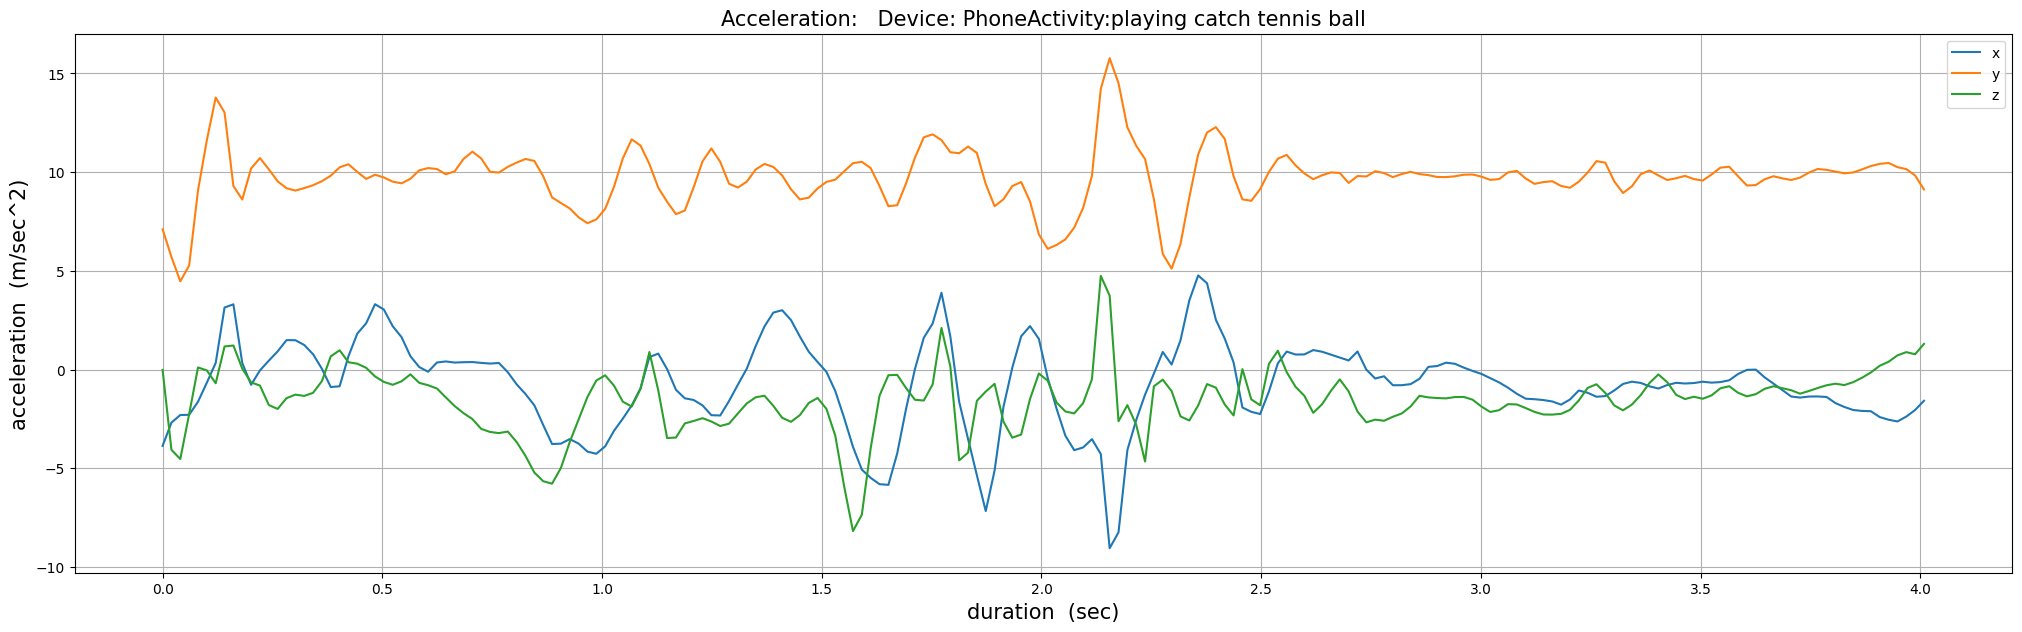

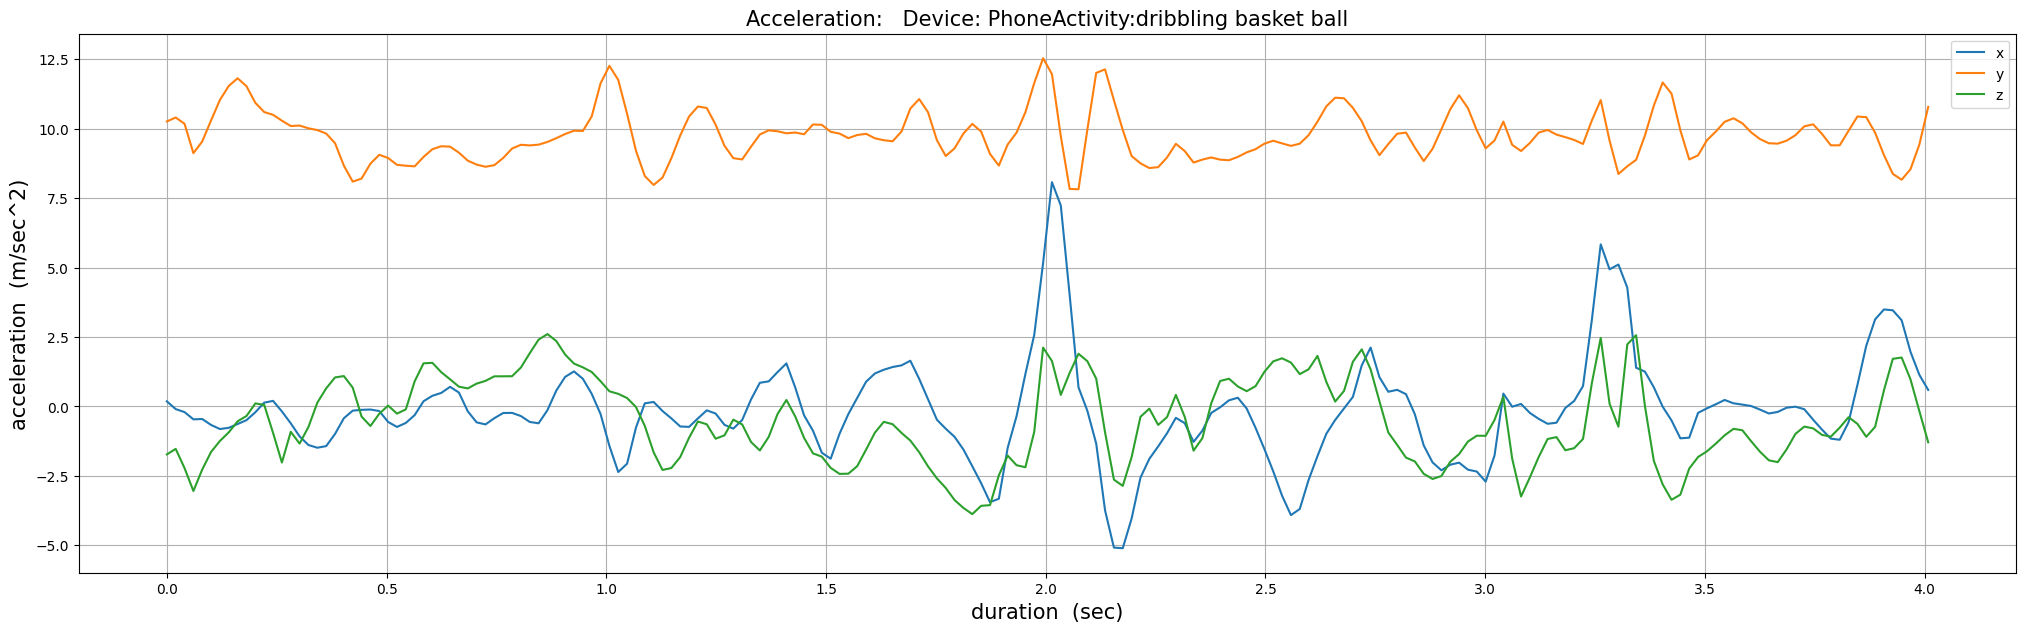

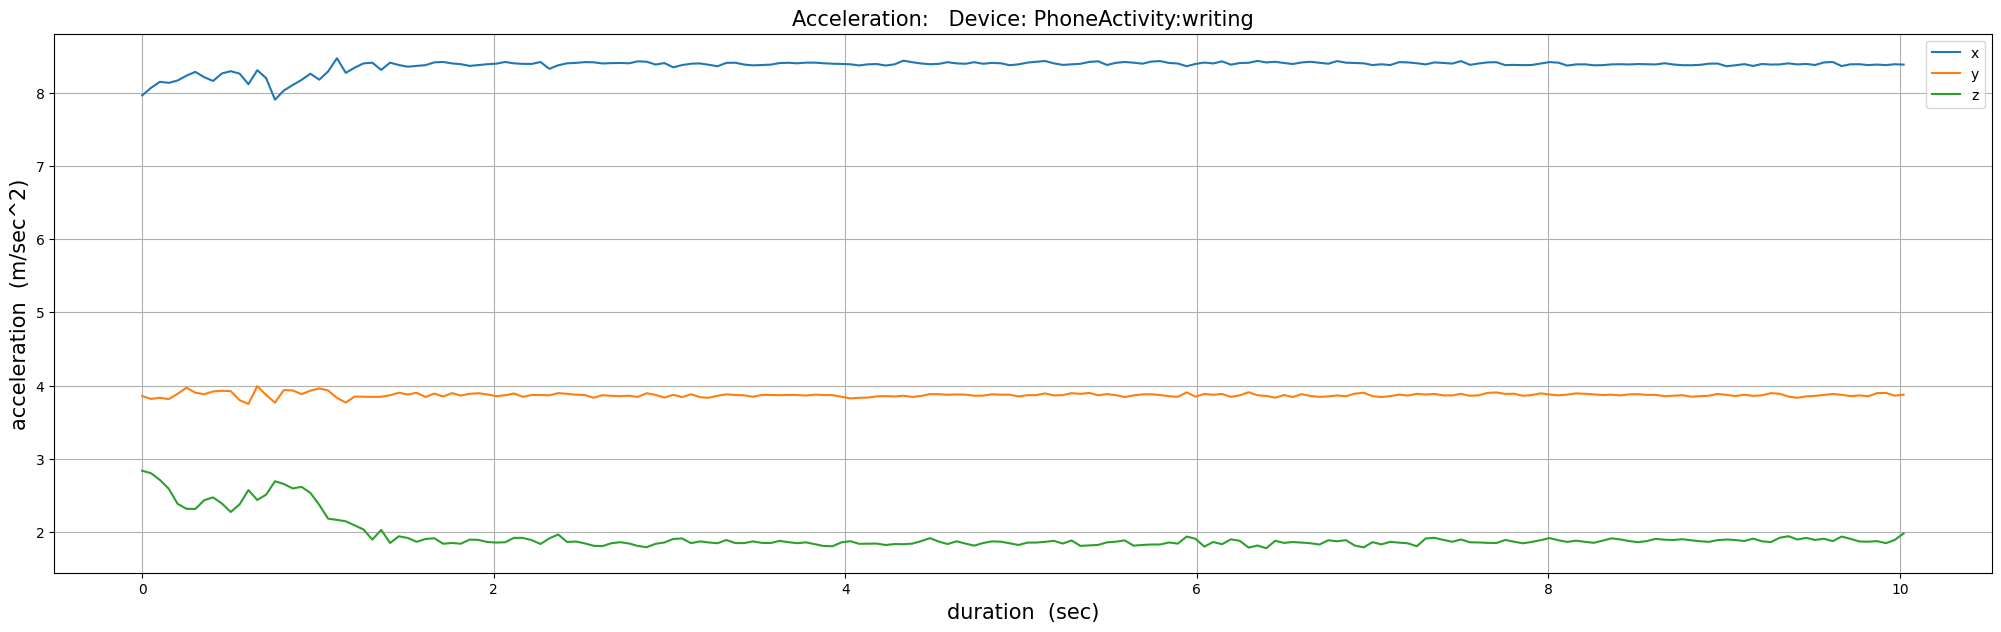

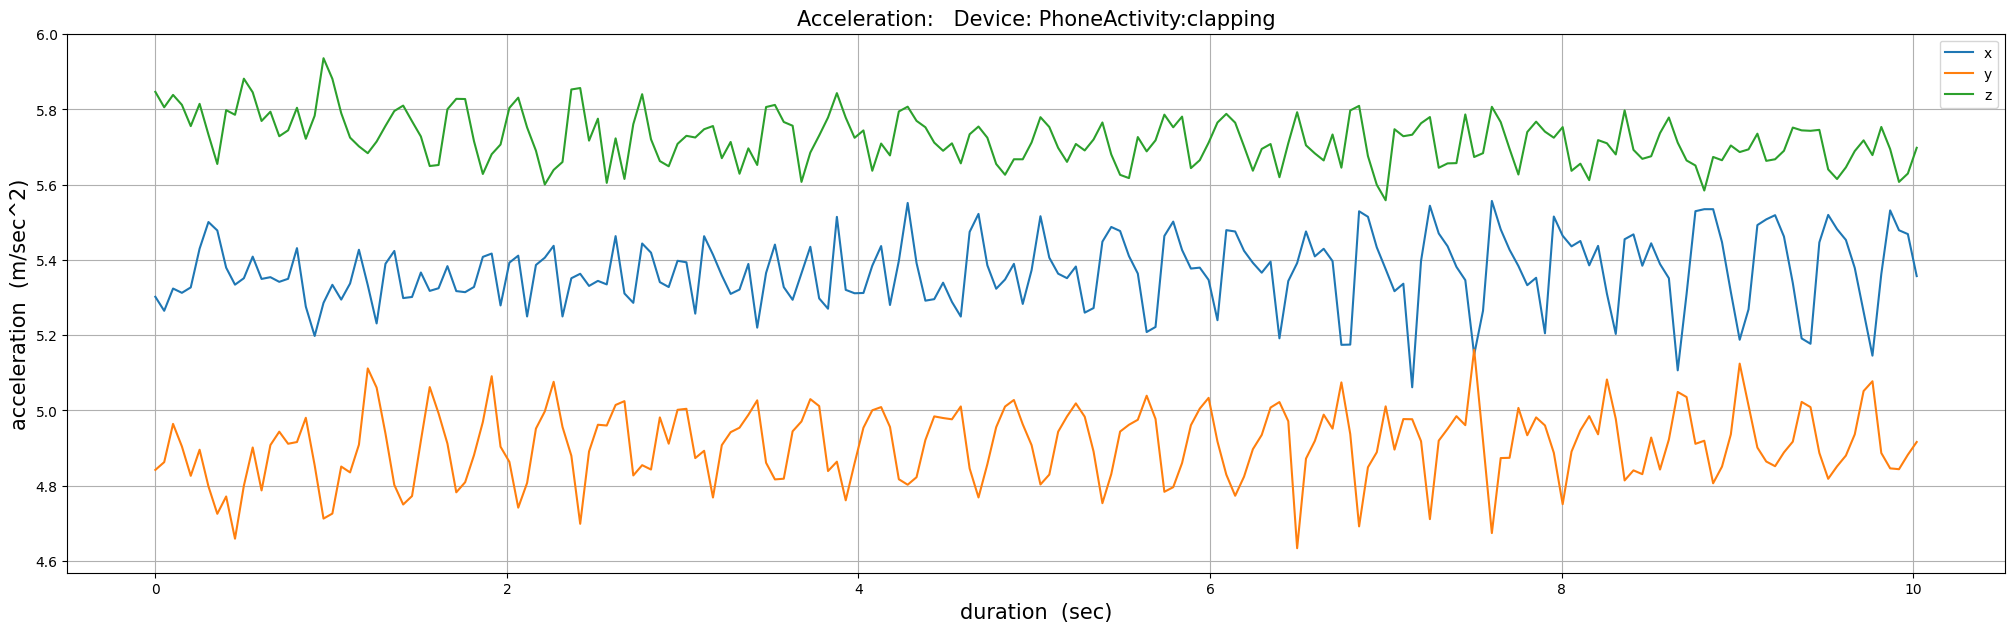

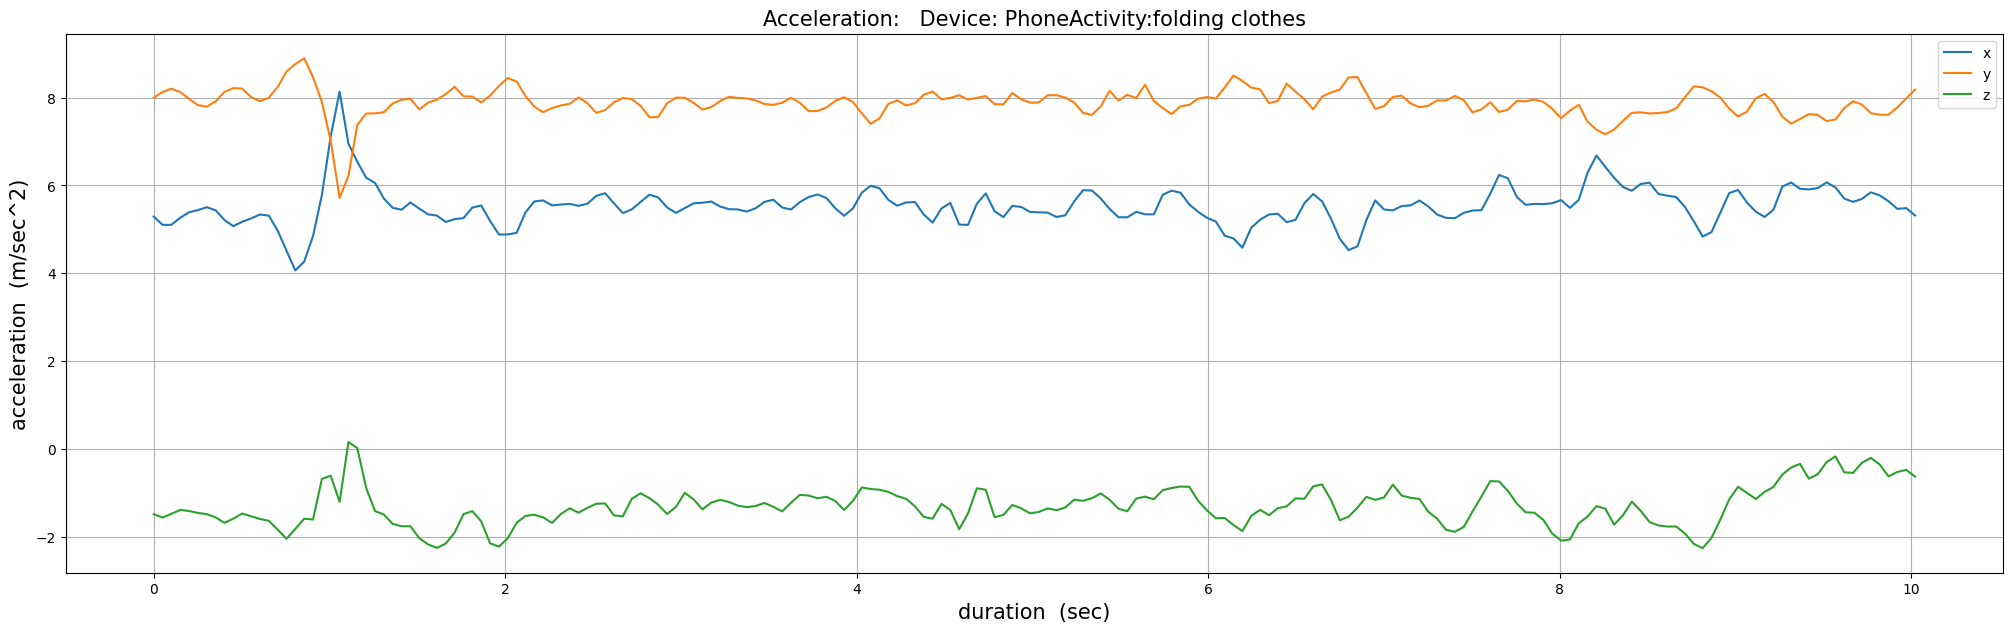

In [37]:
for key in activity_codes_mapping:
    show_accel_per_activity('Phone', raw_par_10_phone_accel, activity_codes_mapping[key], 10)

In [38]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [52]:
#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611-1617'

path = r'arff_files/phone/accel'
all_files = glob.glob(path + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.000,0.00,0.000,0.055,0.305,0.360,0.130,0.135,0.015,...,0.490037,0.483740,0.460663,0.732389,0.489732,0.028727,0.027288,0.223190,9.76027,1630
1,A,0.000,0.00,0.000,0.045,0.325,0.315,0.165,0.125,0.025,...,0.481726,0.475536,0.418810,0.726626,0.388187,0.105971,0.159064,0.144815,9.78219,1630
2,A,0.000,0.00,0.000,0.065,0.310,0.290,0.165,0.130,0.035,...,0.487541,0.481276,0.404669,0.659197,0.415224,0.136438,0.033059,0.224568,9.91358,1630
3,A,0.000,0.00,0.000,0.075,0.305,0.270,0.175,0.130,0.045,...,0.485146,0.478912,0.356819,0.687920,0.331362,0.081853,0.098187,0.127070,9.89051,1630
4,A,0.000,0.00,0.000,0.095,0.280,0.325,0.125,0.125,0.050,...,0.472345,0.466276,0.401211,0.673864,0.377360,0.129168,0.115626,0.170521,9.79377,1630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,S,0.085,0.87,0.045,0.000,0.000,0.000,0.000,0.000,0.000,...,0.301115,0.297245,0.819750,0.843326,0.885157,-0.240015,0.404147,-0.194501,9.86525,1623
20646,S,0.045,0.93,0.025,0.000,0.000,0.000,0.000,0.000,0.000,...,0.250726,0.247505,0.882858,0.843529,0.924976,-0.375267,0.105853,-0.347694,9.83254,1623
20647,S,0.115,0.85,0.035,0.000,0.000,0.000,0.000,0.000,0.000,...,0.314565,0.310523,0.846374,0.783956,0.816690,-0.096962,0.283083,-0.055892,9.85928,1623
20648,S,0.085,0.85,0.060,0.005,0.000,0.000,0.000,0.000,0.000,...,0.353186,0.348647,0.739531,0.765779,0.813776,0.034647,0.414515,-0.073013,9.88992,1623


In [53]:
all_phone_accel["ACTIVITY"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype=object)

### 

In [54]:
all_phone_accel.drop(all_phone_accel[all_phone_accel["ACTIVITY"] == "E"].index, axis=0,inplace=True)
all_phone_accel.drop(all_phone_accel[all_phone_accel["ACTIVITY"] == "G"].index, axis=0,inplace=True)
all_phone_accel.drop(all_phone_accel[all_phone_accel["ACTIVITY"] == "R"].index, axis=0,inplace=True)
all_phone_accel.drop(all_phone_accel[all_phone_accel["ACTIVITY"] == "S"].index, axis=0,inplace=True)

In [66]:
all_phone_accel= all_phone_accel.reset_index(drop=True)

In [55]:
all_phone_accel["ACTIVITY"].unique()

array(['A', 'B', 'C', 'D', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'O', 'P',
       'Q'], dtype=object)

In [45]:
all_phone_accel.shape

(10301, 93)

In [56]:
all_phone_accel.replace({"ACTIVITY" :{"A":"active","B":"active","C":"active",
                                      "D":"sedentary","F":"sedentary","H":"sedentary",
                                      "I":"sedentary","J":"sedentary","K":"sedentary",
                                      "L":"sedentary","M":"active","O":"active",
                                      "P":"active","Q":"sedentary"}},
                        inplace= True)

In [57]:
all_phone_accel["ACTIVITY"].value_counts()

sedentary    9045
active       6941
Name: ACTIVITY, dtype: int64

In [67]:
all_phone_accel[['XABSOLDEV', 'YABSOLDEV','ZABSOLDEV',
                 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 
                 'XVAR', 'YVAR', 'ZVAR']]

,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR
0,2.305310,1.353360,1.859360,0.201152,0.120308,0.156938,0.448499,0.346854,0.396154
1,2.339950,1.308420,2.076810,0.202390,0.120262,0.170288,0.449877,0.346789,0.412660
2,2.539100,1.452820,2.069070,0.220999,0.128778,0.174537,0.470106,0.358856,0.417776
3,2.574220,1.472760,2.009090,0.219884,0.130752,0.169920,0.468918,0.361596,0.412214
4,2.569830,1.522180,2.087940,0.224500,0.132892,0.175281,0.473815,0.364543,0.418665
...,...,...,...,...,...,...,...,...,...
15981,0.026620,0.025093,0.027823,0.002629,0.002286,0.002481,0.051272,0.047816,0.049813
15982,0.022419,0.019673,0.026580,0.001999,0.001749,0.002371,0.044708,0.041816,0.048696
15983,0.032385,0.022527,0.025535,0.003139,0.002134,0.002468,0.056031,0.046194,0.049676
15984,0.021757,0.018223,0.024031,0.001892,0.001628,0.002126,0.043493,0.040346,0.046108


The following columns:'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV' ,'XVAR', 'YVAR', 'ZVAR' are suspected to contain erroneous data: ( e.g. absolute deviation is not of the same order of magnitude of standard deviation; variance is not the square of standard deviation !!!)


In [68]:
all_phone_accel.drop(['XSTANDDEV','YSTANDDEV','ZSTANDDEV',
                      'XVAR','YVAR','ZVAR'], axis = 1, 
                     inplace = True)

/var/folders/mh/wqcr2cx16h3grwmsnz9ky3yr0000gn/T/ipykernel_15091/526932259.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_phone_accel['XAVG'])


<AxesSubplot: xlabel='XAVG', ylabel='Density'>

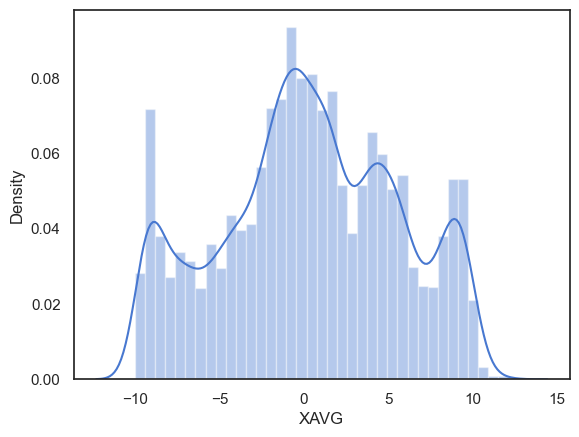

In [70]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.distplot(all_phone_accel['XAVG'])

/var/folders/mh/wqcr2cx16h3grwmsnz9ky3yr0000gn/T/ipykernel_15091/2261583816.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_phone_accel['YAVG'])


<AxesSubplot: xlabel='YAVG', ylabel='Density'>

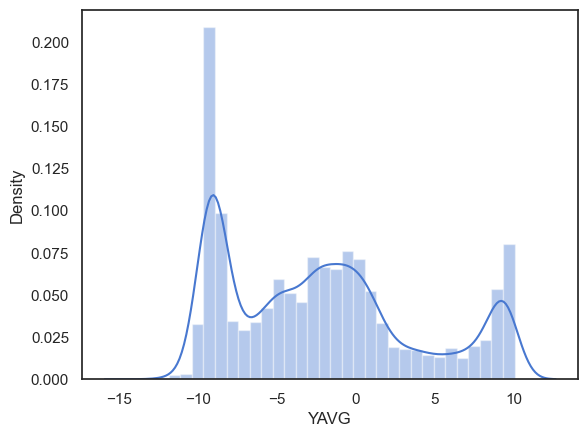

In [71]:
sns.distplot(all_phone_accel['YAVG'])

/var/folders/mh/wqcr2cx16h3grwmsnz9ky3yr0000gn/T/ipykernel_15091/3061136586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_phone_accel['ZAVG'])


<AxesSubplot: xlabel='ZAVG', ylabel='Density'>

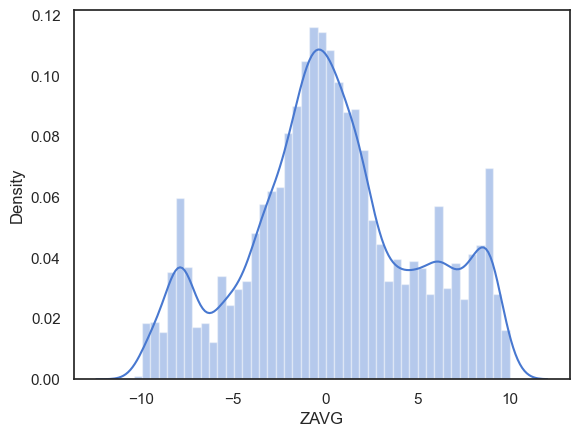

In [74]:
sns.distplot(all_phone_accel['ZAVG'])

/var/folders/mh/wqcr2cx16h3grwmsnz9ky3yr0000gn/T/ipykernel_15091/1949394513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_phone_accel['RESULTANT'])


<AxesSubplot: xlabel='RESULTANT', ylabel='Density'>

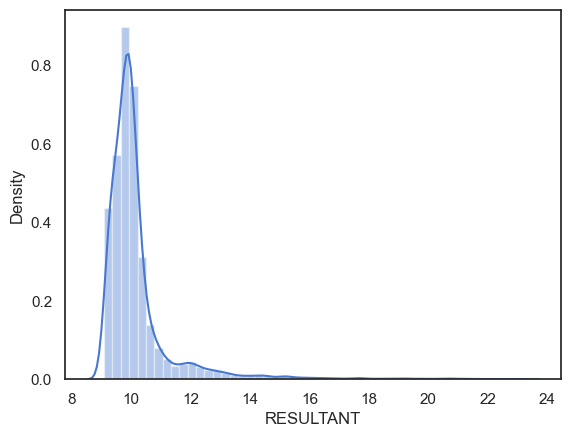

In [75]:
sns.distplot(all_phone_accel['RESULTANT'])

### Preprocessing data

In [76]:
all_phone_accel.drop('PARTICIPANT', axis = 1, inplace = True)

In [121]:
y = all_phone_accel.ACTIVITY
X = all_phone_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.80, 
                                                    test_size = 0.20,
                                                    shuffle = True, 
                                                    stratify = all_phone_accel.ACTIVITY)

<AxesSubplot: title={'center': 'row count per activity'}>

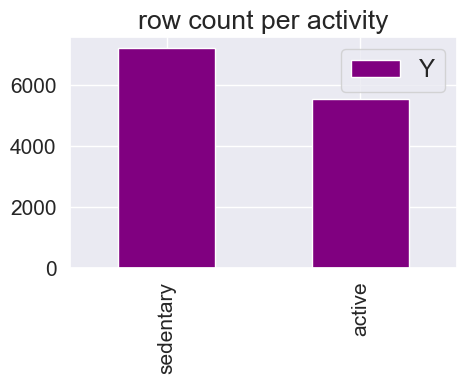

In [264]:
y_train.value_counts().plot(kind = 'bar', figsize = (5,3),
                            color = 'purple',legend = True, 
                            fontsize = 15,
                            title = 'row count per activity')

<AxesSubplot: title={'center': 'row count per activity'}>

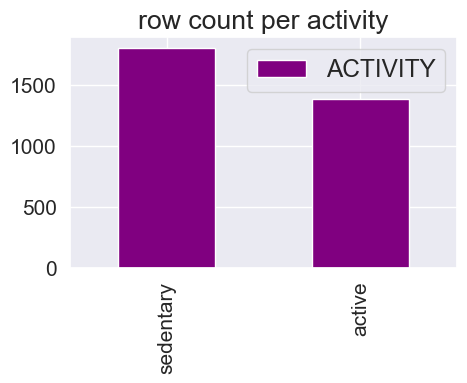

In [263]:
y_test.value_counts().plot(kind = 'bar', figsize = (5,3),
                            color = 'purple',legend = True, 
                            fontsize = 15,
                            title = 'row count per activity')

- both train and test class labels sets are fairly balanced.

#### Outlier detection

In [124]:
X_train.insert(0, 'Y', y_train)

In [125]:
X_train

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
13082,sedentary,0.910,0.090,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.436658,0.431575,0.426029,0.107773,-0.743066,0.323942,0.606134,0.924183,0.584307,9.88439
11341,sedentary,0.005,0.995,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.415024,0.410192,0.404921,-0.997253,-0.997765,0.997616,-0.192893,-0.089685,-0.537660,10.12580
11205,active,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.506913,0.501012,0.494574,0.296972,-0.504931,-0.552559,-0.215291,0.323869,-0.436548,10.18760
516,sedentary,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.0,...,0.307740,0.304157,0.300249,-0.520756,-0.985369,0.563097,0.487382,0.931158,0.273503,10.00990
90,sedentary,0.000,0.000,0.000,0.000,0.265,0.735,0.000,0.000,0.0,...,0.282294,0.279007,0.275422,0.997876,0.994580,0.994710,-0.385115,-0.696298,-0.117996,9.30325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,sedentary,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.321128,0.317389,0.313311,0.999899,0.999894,0.999885,-0.132806,-0.079553,-0.482690,9.37207
12169,sedentary,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.168454,0.166493,0.164354,-0.996491,0.997062,-0.999480,0.723662,0.260414,0.241473,9.47871
10852,active,0.000,0.000,0.030,0.895,0.060,0.005,0.010,0.000,0.0,...,0.312772,0.309130,0.305158,-0.944027,-0.893599,0.865020,0.095893,-0.329732,-0.283929,9.91578
4813,sedentary,0.535,0.465,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.160571,0.158701,0.156662,-0.941760,0.926627,-0.971986,0.773116,-0.015564,0.046179,9.76042


#### XPEAK

In [126]:
upper_threshold_XPEAK = X_train.XPEAK.mean() + 9*X_train.XPEAK.std()
upper_threshold_XPEAK

175.5654038053648

In [127]:
X_train.XPEAK.max()

145.385

<AxesSubplot: >

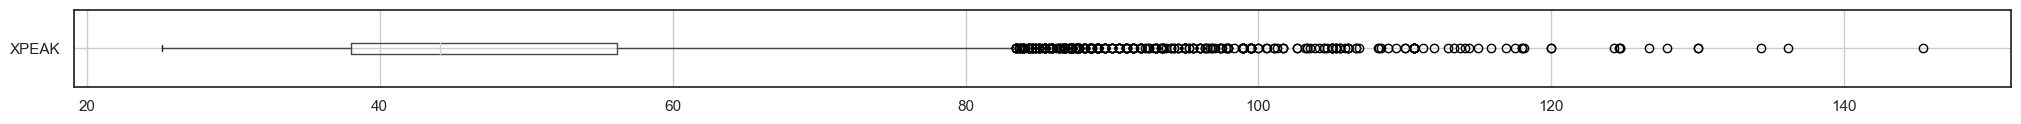

In [128]:
X_train = X_train[X_train.XPEAK < upper_threshold_XPEAK].copy()
X_train.boxplot(column=['XPEAK'], figsize=[25,1], vert=False)

#### YPEAK

In [129]:
upper_threshold_YPEAK = X_train.YPEAK.mean() + 9*X_train.YPEAK.std()
upper_threshold_YPEAK

188.67908909392708

In [130]:
X_train.YPEAK.max()

197.778

<AxesSubplot: >

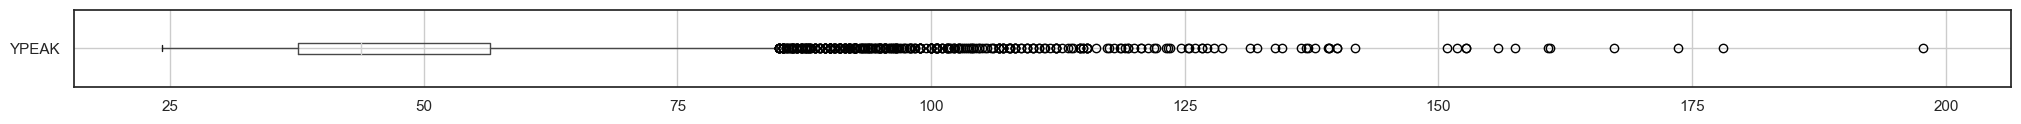

In [131]:
X_train.boxplot(column=['YPEAK'], figsize=[25,1], vert=False)

<AxesSubplot: >

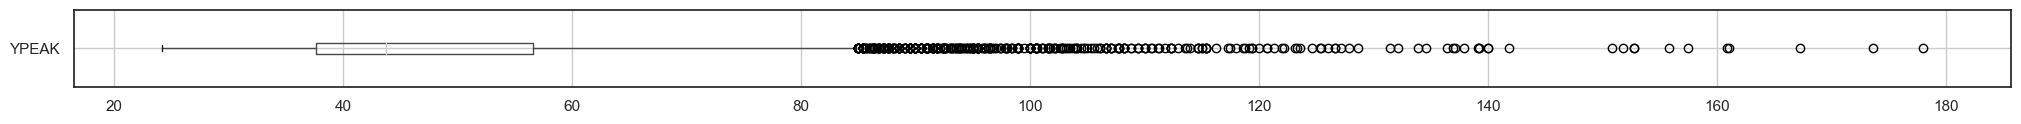

In [132]:
X_train = X_train[X_train.YPEAK < upper_threshold_YPEAK].copy()
X_train.boxplot(column=['YPEAK'], figsize=[25,1], vert=False)

#### ZPEAK

In [133]:
upper_threshold_ZPEAK = X_train.ZPEAK.mean() + 9*X_train.ZPEAK.std()
upper_threshold_ZPEAK

142.50211792576135

In [134]:
X_train.ZPEAK.max()

142.308

<AxesSubplot: >

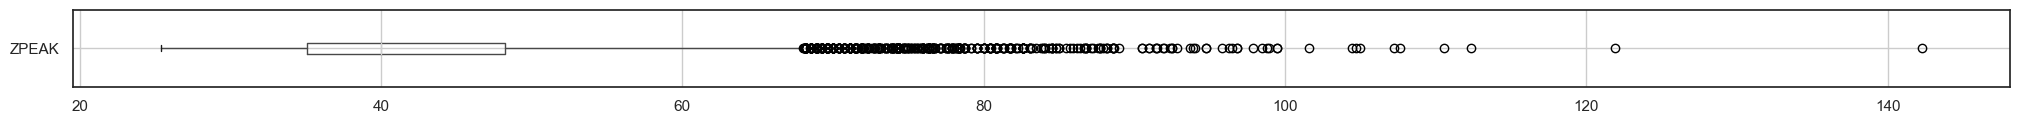

In [135]:
X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)

<AxesSubplot: >

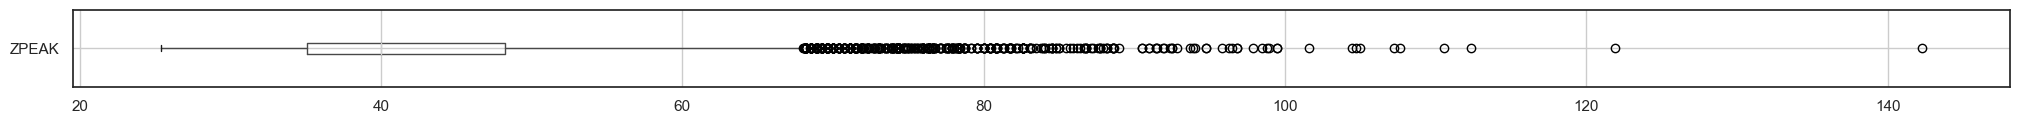

In [136]:
X_train = X_train[X_train.ZPEAK < upper_threshold_ZPEAK].copy()
X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)

In [137]:
y_train = X_train["Y"]

In [138]:
y_train

13082    sedentary
11341    sedentary
11205       active
516      sedentary
90       sedentary
           ...    
6418     sedentary
12169    sedentary
10852       active
4813     sedentary
10499       active
Name: Y, Length: 12787, dtype: object

In [139]:
X_train.drop(["Y"], axis = 1, inplace=True)

## Scaling

rescaling will now be applied to the features that their absolute values exceed the range of ~1

In [266]:
scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG','ZAVG', 'XPEAK', 'YPEAK',
                                                  'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 
                                                  'RESULTANT']])
pickle.dump(scaling_transformer, open('standardScalar.pkl', 'wb'))

In [267]:
X_train[['XAVG', 'YAVG', 'ZAVG', 
         'XPEAK','YPEAK', 'ZPEAK', 
         'XABSOLDEV','YABSOLDEV', 'ZABSOLDEV', 
         'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG',
                                                                'XPEAK','YPEAK','ZPEAK',
                                                                'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 
                                                                'RESULTANT']])

In [268]:
X_test = X_test.copy()

In [269]:
X_test[['XAVG', 'YAVG', 'ZAVG', 
         'XPEAK','YPEAK', 'ZPEAK', 
         'XABSOLDEV','YABSOLDEV', 'ZABSOLDEV', 
         'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG',
                                                                'XPEAK','YPEAK','ZPEAK',
                                                                'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 
                                                                'RESULTANT']])

In [271]:
X_train.reset_index(drop = True, inplace = True)
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0.910,0.090,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.436658,0.431575,0.426029,0.107773,-0.743066,0.323942,0.606134,0.924183,0.584307,0.426881
1,0.005,0.995,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.415024,0.410192,0.404921,-0.997253,-0.997765,0.997616,-0.192893,-0.089685,-0.537660,0.437307
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.506913,0.501012,0.494574,0.296972,-0.504931,-0.552559,-0.215291,0.323869,-0.436548,0.439976
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.0,0.0,...,0.307740,0.304157,0.300249,-0.520756,-0.985369,0.563097,0.487382,0.931158,0.273503,0.432302
4,0.000,0.000,0.000,0.000,0.265,0.735,0.000,0.000,0.0,0.0,...,0.282294,0.279007,0.275422,0.997876,0.994580,0.994710,-0.385115,-0.696298,-0.117996,0.401783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12782,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.321128,0.317389,0.313311,0.999899,0.999894,0.999885,-0.132806,-0.079553,-0.482690,0.404755
12783,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.168454,0.166493,0.164354,-0.996491,0.997062,-0.999480,0.723662,0.260414,0.241473,0.409361
12784,0.000,0.000,0.030,0.895,0.060,0.005,0.010,0.000,0.0,0.0,...,0.312772,0.309130,0.305158,-0.944027,-0.893599,0.865020,0.095893,-0.329732,-0.283929,0.428237
12785,0.535,0.465,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.160571,0.158701,0.156662,-0.941760,0.926627,-0.971986,0.773116,-0.015564,0.046179,0.421527


In [156]:
X_test.reset_index(drop = True, inplace = True)
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0.000,1.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.443194,0.438034,0.432405,0.980822,-0.993053,-0.990258,-0.187674,0.437411,-0.008293,0.397521
1,0.515,0.485,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.031466,0.031100,0.030700,0.974222,-0.898641,-0.919623,-0.814869,0.004998,-0.170473,0.419645
2,0.445,0.125,0.080,0.050,0.025,0.04,0.05,0.075,0.055,0.055,...,0.775892,0.766859,0.757005,0.082010,0.078333,-0.105188,0.191780,0.071406,0.209611,0.837767
3,0.000,0.000,0.000,0.000,1.000,0.00,0.00,0.000,0.000,0.000,...,0.426882,0.421913,0.416491,0.968767,-0.999940,-0.968584,0.187389,0.516010,-0.136064,0.436072
4,0.000,1.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.176277,0.174225,0.171986,0.983632,0.985088,0.998567,-0.434603,0.230078,-0.427410,0.401416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0.000,0.000,0.000,0.000,0.000,1.00,0.00,0.000,0.000,0.000,...,0.260031,0.257004,0.253701,0.985237,-0.994028,-0.989712,-0.687365,0.864932,-0.466383,0.433887
3194,0.000,0.000,0.000,0.000,1.000,0.00,0.00,0.000,0.000,0.000,...,0.423665,0.418733,0.413352,-0.999113,-0.999901,0.999219,0.177679,0.603308,0.004242,0.444204
3195,0.005,0.675,0.315,0.005,0.000,0.00,0.00,0.000,0.000,0.000,...,0.303113,0.299584,0.295735,0.362430,-0.089139,0.630252,0.163438,-0.442725,-0.340446,0.422612
3196,0.000,0.000,0.000,0.000,0.000,1.00,0.00,0.000,0.000,0.000,...,0.389610,0.385074,0.380125,0.998645,-0.999973,-0.998689,-0.312241,0.514093,0.102613,0.443159


In [275]:
X_test.to_csv("test_data.csv", sep=',', index=False, encoding='utf-8')

In [157]:
y_train.reset_index(drop = True, inplace = True)
y_train

0        sedentary
1        sedentary
2           active
3        sedentary
4        sedentary
           ...    
12782    sedentary
12783    sedentary
12784       active
12785    sedentary
12786       active
Name: Y, Length: 12787, dtype: object

In [158]:
y_test.reset_index(drop = True, inplace = True)
y_test

0       sedentary
1          active
2          active
3       sedentary
4       sedentary
          ...    
3193    sedentary
3194    sedentary
3195       active
3196    sedentary
3197       active
Name: ACTIVITY, Length: 3198, dtype: object

In [278]:
y_test.to_csv("target_data.csv", sep=',', index=False, encoding='utf-8')

### Classification

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

### Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
lr_classifier = LogisticRegression(verbose = 0)

In [225]:
my_param_grid = {'C': [5, 10, 15, 20]}

In [226]:
lr_model_gs = GridSearchCV(estimator=lr_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring = 'accuracy')

In [227]:
lr_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=LogisticRegression(), param_grid={'C': [5, 10, 15, 20]},
             scoring='accuracy')

In [228]:
lr_best_classifier = lr_model_gs.best_estimator_

In [229]:
lr_model_gs.cv_results_

{'mean_fit_time': array([0.13334756, 0.12590504, 0.1168067 , 0.11798215]),
 'std_fit_time': array([0.02704941, 0.0091594 , 0.00295193, 0.00413985]),
 'mean_score_time': array([0.00699778, 0.00813937, 0.00669274, 0.0069622 ]),
 'std_score_time': array([0.00059304, 0.00105114, 0.00022049, 0.00035778]),
 'param_C': masked_array(data=[5, 10, 15, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 5}, {'C': 10}, {'C': 15}, {'C': 20}],
 'split0_test_score': array([0.97081053, 0.97054991, 0.97002867, 0.97054991]),
 'split1_test_score': array([0.97237425, 0.97211363, 0.97159239, 0.97081053]),
 'split2_test_score': array([0.97002867, 0.97107115, 0.97133177, 0.97081053]),
 'split3_test_score': array([0.97315611, 0.97341673, 0.97393797, 0.97471983]),
 'split4_test_score': array([0.97237425, 0.97289549, 0.97289549, 0.97393797]),
 'mean_test_score': array([0.97174876, 0.97200938, 0.97195726, 0.97216575]),
 'std_test_score': arr

In [230]:
lr_best_classifier.get_params()

{'C': 20,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [231]:
scores = cross_val_score(lr_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.9692468074016158,
 0.9739379723742507,
 0.9697680479541309,
 0.9736773520979932,
 0.9728954912692207]

In [232]:
y_train_pred=lr_best_classifier.predict(X_train)

In [233]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9719246109329788

In [234]:
log_loss(y_train, lr_best_classifier.predict_proba(X_train))

0.0838567024908588

In [235]:
y_test_pred = lr_best_classifier.predict(X_test)

In [236]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
 
cm_act = pd.DataFrame(cm,
                      index=lr_best_classifier.classes_,
                      columns=lr_best_classifier.classes_)

cm_act.columns = ["active", "sedentary"]
cm_act.index = ["active", "sedentary"]
cm_act

,active,sedentary
active,1352,37
sedentary,48,1761


<AxesSubplot: >

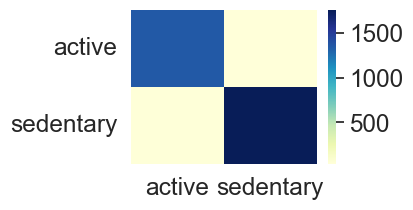

In [237]:
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm_act, cmap="YlGnBu")

In [238]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(2)],index=["active","sedentary"])
accuracy_per_activity

,0
active,0.973362
sedentary,0.973466


In [239]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

      active       0.97      0.97      0.97      1389
   sedentary       0.98      0.97      0.98      1809

    accuracy                           0.97      3198
   macro avg       0.97      0.97      0.97      3198
weighted avg       0.97      0.97      0.97      3198



In [240]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9734208880550344

In [241]:
log_loss(y_test, lr_best_classifier.predict_proba(X_test))

0.08537905328988685

### KNearest Neighbor

In [242]:
from sklearn.neighbors import KNeighborsClassifier

In [243]:
knn_classifier = KNeighborsClassifier()

In [244]:
my_param_grid = {'n_neighbors': [2, 4, 6], 'leaf_size': [10, 15, 20]}

In [245]:
knn_model_gs = GridSearchCV(estimator = knn_classifier, 
                            param_grid = my_param_grid,
                            cv = my_cv, 
                            scoring ='accuracy')


In [246]:
knn_model_gs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 15, 20], 'n_neighbors': [2, 4, 6]},
             scoring='accuracy')

In [247]:
knn_best_classifier = knn_model_gs.best_estimator_

In [248]:
print(knn_model_gs.best_params_)

{'leaf_size': 10, 'n_neighbors': 4}


In [249]:
knn_model_gs.cv_results_

{'mean_fit_time': array([0.05200305, 0.04636264, 0.04779553, 0.04656692, 0.04714031,
        0.04608407, 0.04403019, 0.04305916, 0.04516973]),
 'std_fit_time': array([0.00578245, 0.00110345, 0.00275614, 0.00132134, 0.00070971,
        0.00093317, 0.00057228, 0.000583  , 0.00316543]),
 'mean_score_time': array([0.6025239 , 0.72267189, 0.83706646, 0.58724899, 0.72536712,
        0.82248659, 0.57389755, 0.69708948, 0.78639588]),
 'std_score_time': array([0.00340965, 0.00841929, 0.00984988, 0.0054797 , 0.00541202,
        0.00698372, 0.00911803, 0.01278904, 0.01640702]),
 'param_leaf_size': masked_array(data=[10, 10, 10, 15, 15, 15, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[2, 4, 6, 2, 4, 6, 2, 4, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?

In [250]:
knn_best_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [251]:
scores = cross_val_score(knn_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.9788897576231431,
 0.9773260359655981,
 0.9747198332030232,
 0.9734167318217357,
 0.9739379723742507]

- Applying model to train set first, just to verify that there is no substantial overfitting

In [252]:
y_train_pred=knn_best_classifier.predict(X_train)

In [253]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.982951435051224

In [254]:
y_test_pred = knn_best_classifier.predict(X_test)

In [255]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
    
cm_act = pd.DataFrame(cm,
                      index = knn_best_classifier.classes_,
                      columns = knn_best_classifier.classes_)

cm_act.columns = ["active", "sedentary"]
cm_act.index = ["active", "sedentary"]
cm_act

,active,sedentary
active,1383,6
sedentary,53,1756


<AxesSubplot: >

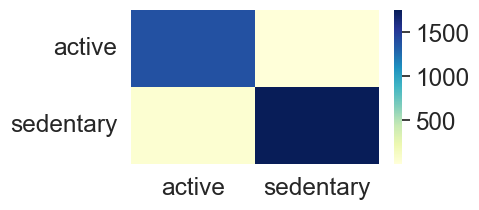

In [261]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(cm_act, cmap="YlGnBu")

In [257]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(2)],index=["active", "sedentary"])
accuracy_per_activity

,0
active,0.995680
sedentary,0.970702


In [258]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

      active       0.96      1.00      0.98      1389
   sedentary       1.00      0.97      0.98      1809

    accuracy                           0.98      3198
   macro avg       0.98      0.98      0.98      3198
weighted avg       0.98      0.98      0.98      3198



In [259]:
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.9815509693558474

### Models Accuracy

- Logistic Regression : 0.97
- K-Nearest Neighbor : 0.98

In [260]:

filename = 'status_model.pkl'
pickle.dump(lr_best_classifier, open(filename, 'wb'))
dump(scaler, open('standardScalar.pkl', 'wb'))